# Sklearn: ensemble learning, le bagging, le boosting et le stacking

URL: https://youtu.be/7C_YpudYtw8?si=8joU47J4NOPxlNzZ

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

# Ensemble learning

Les techniques d'Ensemble Learning : Bagging Boosting et Stacking, qui permettent de développer les modèles de machine learning les plus puissants au monde, comme l'algorithme de Random Forest.

Tout repose sur le concept : **The Wisdom of the Crowd**. Les modèles de machine learning réunis ensemble sont plus forts qu'un modèle de machine learning tout seul.
Pour ça, il faut que les modèles soient un minimum compétents et suffisamment diversifiés.

**Le Bagging (et la random forest)** permet d'obtenir des ensemble de modèles diversifiés en entraînant chaque modèle sur une portion aléatoire des données (en échantillonnant le dataset avec le Bootstrapping)

**Le Boosting** permet quant à lui de construire des modèles les uns après les autres, en demandant à chaque modèle de corriger les erreurs de son prédécesseur. (Adaboost et GradientBoosting sont des exemples d'algorithmes)

**Le Stacking** permet d’entraîner un modèle de machine learning a reconnaître qui a tort et qui a raison dans un ensemble de modèles, ce qui améliore encore plus la performance générale !

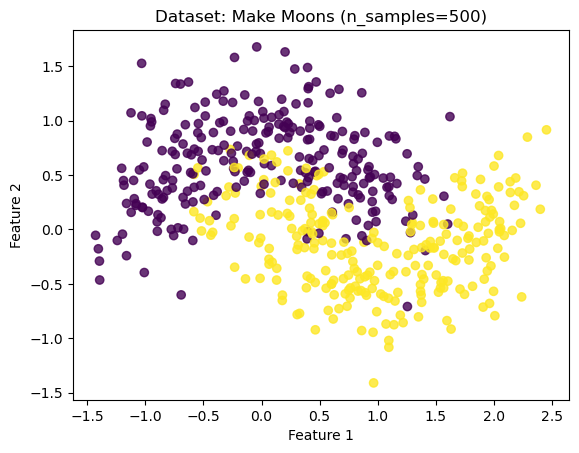

In [6]:
#générer un jeu de données en forme de lunes  
#n_samples=500: le nombre total d'échantillons à générer  
# noise=0.3: le niveau de bruit à ajouter aux données (plus il y a de bruit, plus les points seront dispersés)  
# random_state=0: permet de rendre le résultat reproductible  
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)  

#tracer les données X[:, 1] en fonction de X[:, 0]
#plt.scatter: crée un nuage de point  
#X[:, 0] représente toutes les lignes de la 1ère colonne de X (feature 1)
#X[:, 1] représente toutes les lignes de la 2ème colonne de X (feature 2) 
# c=y: couleur des points en fonction de leurs labels (0 ou 1)  
# alpha=0.8: transparence des points (0: transparent, 1: opaque)  
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

plt.title('Dataset: Make Moons (n_samples=500)')  # titre du graphique  
plt.xlabel('Feature 1')  #l'axe des abscisses
plt.ylabel('Feature 2')  #l'axe des ordonnées

#diviser les données en ensembles d'entraînement et de test  
#train_test_split(): répartit les données en ensembles d'entraînement et de test
#test_size=0.3: proportion des données à utiliser pour le test (ici 30% pour le test set, 70% pour le train set)  
#random_state=0: permet de rendre cette opération reproductible  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Voting Classifier

- **Voting Classifier:**

**Hard voting:** vote sur **les prédictions**. Il consiste à prendre la décision (vote) majoritaire.

**Soft voting:** vote sur **les probabilités de chaque classe**. Il consiste à accumuler les probabilités de chaque classe.

- **Mais quand utiliser le Hard voting ou le Soft voting?**

En général, on dit que le **Soft voting est un peu meilleur lorsque les modèles sont bien calibrés**. Donc il est mieux de l'utiliser quand c'est possible. Càd quand on peut utiliser des modèles qui émettent des probabilités.

Celà dit, **en général, Voting Classifier n'est pas une technique d'ensemble très efficace**. Parce qu'il est difficile pour cette technique de respecter 1 des 3 critères du "Wisdom of the crowd" (taille de la foule, ici le nombre de modèles, sa compétence et sa diversité): le critère de diversité. Ici par exemple, les 3 modèles disent tous à peu près la même chose, donc ils ne sont pas très diversifiés. **La meilleure façon** de gagner de la diversité est à travers **le bagging et le boosting**.

**Remarque:** pour le **Voting Regressor**, la prédiction finale correspond à la **moyenne des prédictions**.

In [9]:
#initialisation des modèles de classification avec un état aléatoire fixe pour la reproductibilité  
#random_state=0: garantit des résultats reproductibles en fixant la graine du générateur de nombres aléatoires
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

#entraîner chaque modèle sur les données d'entraînement et afficher les scores sur les données de test
#le code itère à travers une liste contenant tous les modèles:
#pour chaque modèle, la méthode fit est appelée avec X_train et y_train pour entraîner le modèle sur l'ensemble d'entraînement
#après l'entraînement, pour chaque modèle, le score (précision) est calculé sur l'ensemble de test X_test et y_test
#la précision est le pourcentage de bonnes classifications par rapport au nombre total de cas testés
#le nom de la classe du modèle et son score sont affichés, permettant de comparer les performances des différents modèles
for model in (model_1, model_2, model_3):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86


In [10]:
#Voting Classifier:

#initialisation des modèles de classification avec un état aléatoire fixe pour la reproductibilité  
#random_state=0: garantit des résultats reproductibles en fixant la graine du générateur de nombres aléatoires
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

#création d'un classificateur par vote
#VotingClassifier prend une liste de tuples
#chaque tuple contenant un surnom d'un modèle (comme 'SGD' et 'Tree') et le nom du modèle correspondant
#voting='hard': le classificateur va faire des prédictions basées sur le vote majoritaire des classificateurs individuels
model_4 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                           voting='hard')

#entraîner chaque modèle sur les données d'entraînement et afficher les scores sur les données de test
#le code itère à travers une liste contenant tous les modèles:
#pour chaque modèle, la méthode fit est appelée avec X_train et y_train pour entraîner le modèle sur l'ensemble d'entraînement
#après l'entraînement, pour chaque modèle, le score (précision) est calculé sur l'ensemble de test X_test et y_test
#la précision est le pourcentage de bonnes classifications par rapport au nombre total de cas testés
#le nom de la classe du modèle et son score sont affichés, permettant de comparer les performances des différents modèles
for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


In [11]:
#on obtient une performance de 87%
#87% de VotingClassifier > 86% de DecisionTreeClassifier et de KNeighborsClassifier > 84% de SGDClassifier
#càd que la technique d'ensemble a bien fonctionné!

## Bagging

**Le Bagging (et la Random forest)** permet d'obtenir des ensemble de modèles diversifiés en entraînant chaque modèle sur une portion aléatoire des données (en échantillonnant le dataset avec le Bootstrapping)

### BaggingClassifier

In [15]:
#définir le modèle
#estimator=KNeighborsClassifier(): estimateur de base avec lequel on désire travailer, ici KNeighborsClassifier
#n_estimators=100: le nombre d'estimateurs de base qu'on veut avoir dans l'ensemble
model = BaggingClassifier(estimator=KNeighborsClassifier(),
                          n_estimators=100)

#entraîner le modèle sur les données X_train et y_train
model.fit(X_train, y_train)

#tester le modèle sur les données X_test et y_test
model.score(X_test, y_test)

0.8866666666666667

In [16]:
#on obtient une performance de 88%
#88% de BaggingClassifier > 87% de VotingClassifier
#et donc BaggingClassifier est plus performant que VotingClassifier

In [17]:
#définir le modèle
#n_estimators=100: le nombre d'estimateurs qu'on veut avoir
model = RandomForestClassifier(n_estimators=100)

#entraîner le modèle sur les données X_train et y_train
model.fit(X_train, y_train)

#tester le modèle sur les données X_test et y_test 
model.score(X_test, y_test)

0.8733333333333333

In [18]:
#on obtient une performance de 88%

## Boosting

**Le Boosting** permet de construire des modèles les uns après les autres, en demandant à chaque modèle de corriger les erreurs de son prédécesseur. (Adaboost et GradientBoosting sont des exemples d'algorithmes)

### AdaBoostClassifier

In [22]:
#définir le modèle
#n_estimators=100: le nombre d'estimateurs qu'on veut avoir
model = AdaBoostClassifier(n_estimators=100)

#entraîner le modèle sur les données X_train et y_train
model.fit(X_train, y_train)

#tester le modèle sur les données X_test et y_test 
model.score(X_test, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.88

In [23]:
#on obtient une performance de 88%

## Stacking

**Le Stacking** permet d’entraîner un modèle de machine learning à reconnaître qui a tort et qui a raison dans un ensemble de modèles, ce qui améliore encore plus la performance générale !

### StackingClassifier

In [27]:
#création d'un classificateur par stacking
#StackingClassifier prend une liste de tuples
#chaque tuple contenant un surnom d'un modèle (comme 'SGD' et 'Tree') et le nom du modèle correspondant
#final_estimator: KNeighborsClassifier()effectuera ses prédictions par dessus la foule des modèles (SGD, Tree et KNN)
model = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                           final_estimator=KNeighborsClassifier())

#entraîner le modèle sur les données X_train et y_train
model.fit(X_train, y_train)

#tester le modèle sur les données X_test et y_test 
model.score(X_test, y_test)

0.8666666666666667

In [28]:
#on obtient une performance de 86%

**Remarque: Quelle techinque utiliser et en quelles circonstances?**

**Le bagging** est utilisé lorsqu'on se rend compte que les modèles individuels ont tendance à faire l'over-fitting, donc le fait de créer plusieurs experts et faire le vote de leurs prédictions avec le bootstrapping va réduire cet over-fitting.

**Le boosting** est utilisé si, à l'inverse, on travaille sur un problème dans lequel les modèles individuels ont du mal à atteindre une bonne performance simplement sur le train set.